<a href="https://colab.research.google.com/github/rajy4683/S12EVA4/blob/master/S12EVA4_Annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Sample Image from dataset

In [0]:
from PIL import Image, ImageDraw
image = Image.open("/content/drive/My Drive/EVA4/tiny_imagenet/EVA4S12_Imgs/00000000.jpg")
draw = ImageDraw.Draw(image)
draw.rectangle([2,12,109,209], fill=None, outline="yellow")
draw.rectangle([121,21,231,212], fill=None, outline="yellow")

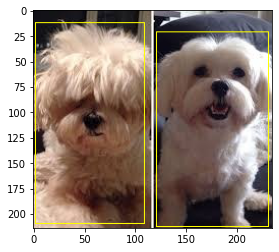

In [0]:
fig,ax = plt.subplots()
ax.imshow(image)
#ax.add_line()

### Extracting data
1. The image_height and image_width parameters are otained from coco formatted JSON file
2. From the annotations Json file(project.json) rest of the attributes (class_name, x,y,h and w) are obtained 




In [0]:
with open('/content/drive/My Drive/EVA4/S12EVA4/coco.json') as f:
  data_coco = json.load(f)

In [9]:
data_coco.keys()

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])

In [10]:
len(data_coco['annotations'])

114

In [11]:
json_formatted_str = json.dumps(data_coco, indent=2)

print(json_formatted_str)

{
  "info": {
    "year": 2020,
    "version": "1",
    "description": "Exported using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)",
    "contributor": "",
    "url": "http://www.robots.ox.ac.uk/~vgg/software/via/",
    "date_created": "Sat Apr 18 2020 13:13:29 GMT+0530 (India Standard Time)"
  },
  "images": [
    {
      "id": 0,
      "width": 600,
      "height": 400,
      "file_name": "adutta_swan.jpg",
      "license": 1,
      "flickr_url": "adutta_swan.jpg",
      "coco_url": "adutta_swan.jpg",
      "date_captured": ""
    },
    {
      "id": 1,
      "width": 600,
      "height": 394,
      "file_name": "wikimedia_death_of_socrates.jpg",
      "license": 1,
      "flickr_url": "wikimedia_death_of_socrates.jpg",
      "coco_url": "wikimedia_death_of_socrates.jpg",
      "date_captured": ""
    },
    {
      "id": 2,
      "width": 235,
      "height": 214,
      "file_name": "00000000.jpg",
      "license": 1,
      "date_captured": ""
    },
    {
 

In [0]:
with open('/content/drive/My Drive/EVA4/S12EVA4/project.json') as projfile:
  data_proj = json.load(projfile)

In [5]:
#print(data_proj)
json_formatted_str = json.dumps(data_proj, indent=2)

print(json_formatted_str)

{
  "adutta_swan.jpg-1": {
    "filename": "adutta_swan.jpg",
    "size": -1,
    "regions": [
      {
        "shape_attributes": {
          "name": "polygon",
          "all_points_x": [
            116,
            94,
            176,
            343,
            383,
            385,
            369,
            406,
            398,
            364,
            310,
            297,
            304,
            244,
            158
          ],
          "all_points_y": [
            157,
            195,
            264,
            273,
            261,
            234,
            222,
            216,
            155,
            124,
            135,
            170,
            188,
            170,
            175
          ]
        },
        "region_attributes": {
          "name": "Swan",
          "type": "bird",
          "image_quality": {
            "good_illumination": true
          }
        }
      }
    ],
    "file_attributes": {
      "caption": "Swan in l

In [0]:
large_array=[]
for key,value in data_proj.items():
    base_info = [value['filename'], value['img_width'], value['img_height']]
    if(len(value['regions']) <=0 ):
        continue
    region_final_arr=[]
    for region_itr in value['regions']:
        region_final_arr = [value['filename'], 
                            value['img_width'], 
                            value['img_height'],
                            region_itr['region_attributes']['name'], 
                            region_itr['region_attributes']['type']
                            ]
        bbox_dims = [v for k,v in region_itr['shape_attributes'].items() if (k != 'name')]
        region_final_arr.extend(bbox_dims)
        large_array.append(region_final_arr)
        print( region_final_arr)
        #region_final_arr.append(v)
    #base_info.extend(region_final_arr)
    #large_array.append(base_info)

['adutta_swan.jpg', 600, 400, 'Swan', 'bird', [116, 94, 176, 343, 383, 385, 369, 406, 398, 364, 310, 297, 304, 244, 158], [157, 195, 264, 273, 261, 234, 222, 216, 155, 124, 135, 170, 188, 170, 175]]
['wikimedia_death_of_socrates.jpg', 600, 394, 'Plato', 'human', 174, 139, 108, 227]
['wikimedia_death_of_socrates.jpg', 600, 394, 'Socrates', 'human', 347, 114, 91, 209]
['wikimedia_death_of_socrates.jpg', 600, 394, 'Hemlock', 'cup', 316, 180, 17, 12]
['00000000.jpg', 235, 214, 'dog', 'unknown', 2, 12, 107, 197]
['00000000.jpg', 235, 214, 'dog', 'unknown', 121, 21, 110, 191]
['00000001.jpg', 225, 225, 'dog', 'unknown', 6, 25, 84, 124]
['00000001.jpg', 225, 225, 'dog', 'unknown', 98, 52, 82, 96]
['00000002.jpg', 279, 181, 'dog', 'unknown', 3, 2, 127, 174]
['00000002.jpg', 279, 181, 'dog', 'unknown', 181, 2, 78, 174]
['00000003.jpg', 301, 167, 'dog', 'unknown', 24, 9, 257, 149]
['00000004.jpg', 308, 164, 'dog', 'unknown', 11, 11, 111, 145]
['00000004.jpg', 308, 164, 'dog', 'unknown', 144, 12,

### DataFrame with base parameters

In [0]:
df_bbox = pd.DataFrame(large_array[4:], columns=['Filename','img_width','img_height','obj_class','obj_type','obj_x','obj_y','obj_width','obj_height'])

In [0]:
df_bbox['obj_x1'] = df_bbox['obj_x']+df_bbox['obj_width']
df_bbox['obj_y1'] = df_bbox['obj_y']+df_bbox['obj_height']

### Normalized parameters
1. New columns are added that contain the normalized values of x,y,h and w are added to the DataFrame.

In [0]:
df_bbox['trans_obj_width'] = df_bbox['obj_width']/df_bbox['img_width']
df_bbox['trans_obj_height'] = df_bbox['obj_height']/df_bbox['img_height']

df_bbox['trans_obj_x'] = df_bbox['obj_x']/df_bbox['img_width']
df_bbox['trans_obj_y'] = df_bbox['obj_y']/df_bbox['img_height']

df_bbox['trans_obj_x1'] = df_bbox['obj_x1']/df_bbox['img_width']
df_bbox['trans_obj_y1'] = df_bbox['obj_y1']/df_bbox['img_height']


In [0]:
df_bbox.loc[df_bbox['trans_obj_height'] > 1, ['Filename','img_width','img_height','obj_class','obj_type','obj_x','obj_y','obj_width','obj_height','trans_obj_height']]

,Filename,img_width,img_height,obj_class,obj_type,obj_x,obj_y,obj_width,obj_height,trans_obj_height


### Scatter plot of normalized height and width of bboxes

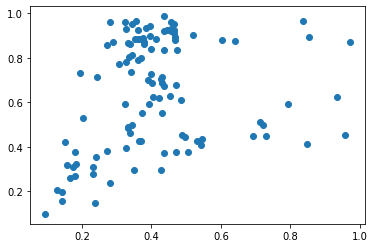

In [0]:
plt.scatter(df_bbox['trans_obj_width'],df_bbox['trans_obj_height'] )

### K-Means clustering 

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
cluster_X = df_bbox.loc[:,['trans_obj_width', 'trans_obj_height']].values

### Elbow method to obtain optimal clusters

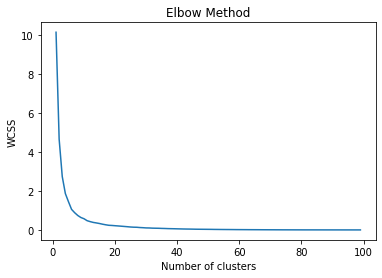

In [0]:
wcss = []
max_clusters = 100
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cluster_X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, max_clusters), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Final K Selection

In [0]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(cluster_X)

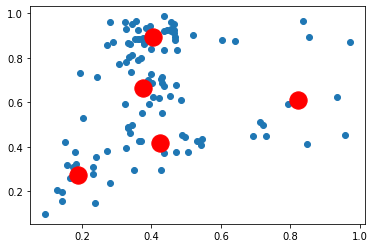

In [0]:
plt.scatter(cluster_X[:,0], cluster_X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [0]:
pd.DataFrame(pred_y).iloc[:,0].value_counts()

4    42
1    22
2    17
0    17
3     8
5     4
Name: 0, dtype: int64

In [0]:
pd.DataFrame(pred_y).iloc[:,0].value_counts()

4    43
1    22
2    17
0    17
3    11
Name: 0, dtype: int64

In [0]:
kmeans.cluster_centers_[:]

array([[0.41733517, 0.64576021],
       [0.29302322, 0.42615326],
       [0.33224723, 0.84967191],
       [0.4938448 , 0.39891314],
       [0.88706624, 0.90942705],
       [0.4589202 , 0.91315547],
       [0.18064346, 0.23907433],
       [0.79863234, 0.49897855]])

In [0]:
df_bbox.to_csv('/content/drive/My Drive/EVA4/tiny_imagenet/EVA4S12_Imgs/s12eva4.csv')

In [0]:
for key,shape in zip(list(data_proj.keys()),image_dims):
    data_proj[key]['img_width']=shape[0]
    data_proj[key]['img_height']=shape[1]